In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Dataset/general_data.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [8]:
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].mean())
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].mean())

# Encoding the Dataset 

In [10]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Attrition'] = lb.fit_transform(df['Attrition'])
df['BusinessTravel'] = lb.fit_transform(df['BusinessTravel'])
df['Department'] = lb.fit_transform(df['Department'])
df['Over18'] = lb.fit_transform(df['Over18'])
df['MaritalStatus'] = lb.fit_transform(df['MaritalStatus'])
df['JobRole'] = lb.fit_transform(df['JobRole'])
df['Gender'] = lb.fit_transform(df['Gender'])
df['EducationField'] = lb.fit_transform(df['EducationField'])

In [11]:
df.head(4)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,0,11,8,3,13.0,5,8,7,5


In [12]:
df = df.drop(['EmployeeCount','EmployeeID', 'Over18','StandardHours'], axis=1)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [18]:
y = df.iloc[:,1]
X = df.drop(['Attrition'], axis=1)

# Creating Random Forest Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)

In [20]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
featur = ['Age', 'BusinessTravel', 'Department', 'DistanceFromHome','Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked','PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion','YearsWithCurrManager']
for feature,imp in zip(featur, rfc.feature_importances_):
    print(feature,"  :  ",imp);

Age   :   0.09684027930281221
BusinessTravel   :   0.027931604397514836
Department   :   0.026026719505613947
DistanceFromHome   :   0.06934307435072837
Education   :   0.0411289917265736
EducationField   :   0.041451321924171544
Gender   :   0.018221484598839405
JobLevel   :   0.03760277658666449
JobRole   :   0.05539009420724176
MaritalStatus   :   0.039282244280236286
MonthlyIncome   :   0.0946607807583323
NumCompaniesWorked   :   0.05585475139028869
PercentSalaryHike   :   0.06639815939859464
StockOptionLevel   :   0.03457624551612524
TotalWorkingYears   :   0.08563443261882414
TrainingTimesLastYear   :   0.044813291877342544
YearsAtCompany   :   0.06715386721899504
YearsSinceLastPromotion   :   0.04324129524330047
YearsWithCurrManager   :   0.05444858509780049


From this we can infer that Age, DistanceFromHome, MonthlyIncome, PercentSalaryHike, TotalWorkingYears, YearsAtCompany have value more than 0.05. Now lets consider this has the important features and use these features in decision tree

In [45]:
DTFeat = df[['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany']]
features = ['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany']

# Creating Decision Tree Model

In [46]:
from sklearn.tree import DecisionTreeClassifier
DTclf = DecisionTreeClassifier(max_depth=10)
DTclf.fit(DTFeat,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

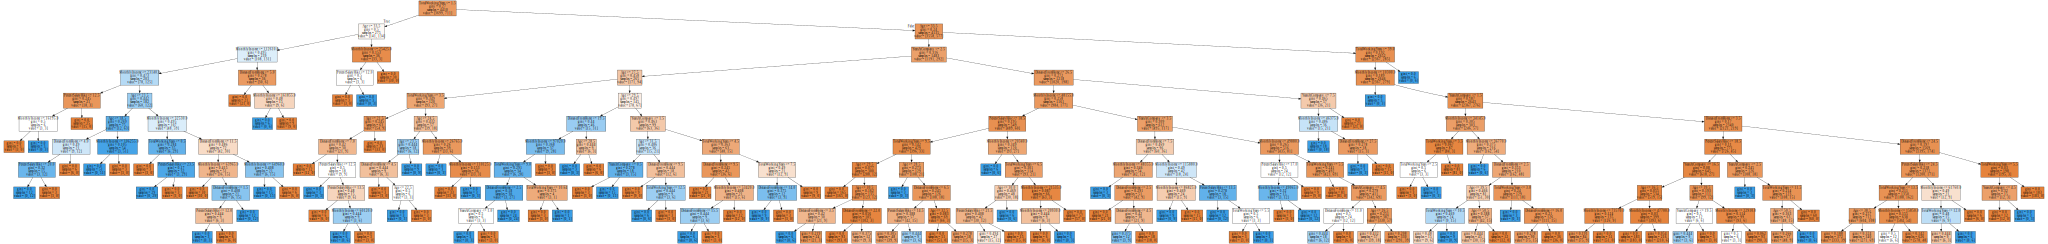

In [48]:
graph = Source(tree.export_graphviz(DTclf, out_file=None, feature_names=features, filled = True))
display(SVG(graph.pipe(format='svg')))

In [49]:
DTclf.score(DTFeat,y)

0.9244897959183673

-------------